In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#! pip install kneed
from kneed import KneeLocator
from sklearn.decomposition import PCA
import pandas as pd 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt 
import plotly.express as px

In [181]:
#T1
class_1 = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 10, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 11, 120, 121, 122, 124, 125, 127, 128, 129, 12, 130, 131, 132, 133, 134, 135, 137, 138, 139, 13, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 14, 150, 151, 152, 153, 154, 155, 156, 157, 159, 15, 160, 161, 162, 163, 165, 166, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 17, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 18, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 19, 1, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 21, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 22, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 23, 23, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 24, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 259, 25, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 26, 270, 271, 272, 273, 274, 274, 275, 276, 277, 278, 279, 27, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 28, 290, 291, 293, 294, 295, 296, 296, 297, 298, 299, 2, 300, 301, 302, 303, 304, 305, 306, 307, 308, 308, 309, 30, 310, 311, 312, 313, 314, 315, 316, 316, 317, 318, 319, 31, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 329, 32, 330, 331, 332, 333, 333, 334, 335, 335, 336, 337, 338, 339, 33, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 34, 350, 351, 352, 353, 356, 358, 359, 35, 360, 361, 362, 36, 37, 38, 39, 3, 40, 41, 42, 43, 44, 44, 45, 46, 47, 47, 48, 49, 4, 51, 52, 53, 54, 55, 56, 57, 58, 58, 59, 5, 60, 62, 63, 64, 65, 66, 67, 68, 69, 6, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 7, 80, 81, 82, 83, 84, 84, 85, 87, 88, 89, 8, 90, 91, 92, 93, 94, 96, 97, 98, 99, 9]

def drop_rows(class_i, Dut):
  data_temp = pd.read_csv('135L0587_139834200_pass.csv')

  module_name = data_temp['sn'].tolist()
  dut = data_temp['dut'].tolist()

  for k in range(len(module_name)):
    if dut[k] != Dut:
      data_temp = data_temp.drop([k])
  module_name = data_temp['sn'].tolist()
  dut = data_temp['dut'].tolist()

  for l in range(len(module_name)):
    if module_name[l] not in class_i:
      data_temp = data_temp.drop([l]) 

  D = {}
  D['module_name'] = data_temp['sn']
  D['dut'] = data_temp['dut']
  D['run'] = data_temp['run']
  D['state'] = data_temp['status']
  
  data_temp = data_temp.drop(['dut','sn','run','status','parser','data_and_features','1st_off','2nd_on','abnormal'], axis=1)
  data_temp.drop(data_temp.columns[0], axis = 1, inplace = True)

  return data_temp, D

In [187]:
d1, D = (drop_rows(class_1, 'T1'))
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 358
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   t_off [us]             359 non-null    float64
 1   tf_off [us]            359 non-null    float64
 2   min_di/dt_off [kA/us]  359 non-null    float64
 3   avg_di/dt_off [kA/us]  359 non-null    float64
 4   max_dv/dt_off [kV/us]  359 non-null    float64
 5   avg_dv/dt_off [kV/us]  359 non-null    float64
 6   E_off [mJ]             359 non-null    float64
 7   v_peak_off [V]         359 non-null    float64
 8   vgs_min_off [V]        359 non-null    float64
 9   vgs_max_off [V]        359 non-null    float64
 10  t_on [us]              359 non-null    float64
 11  tr_on [us]             359 non-null    float64
 12  max_di/dt_on [kA/us]   359 non-null    float64
 13  avg_di/dt_on [kA/us]   359 non-null    float64
 14  min_dv/dt_on [kV/us]   359 non-null    float64
 15  avg_dv

In [ ]:
data = pd.read_csv('135L0587_139834200_pass.csv')

module_name = data['sn'].tolist()
dut = data['dut'].tolist()
data = data.drop(['dut','sn','run','status','parser','data_and_features','1st_off','2nd_on','abnormal'], axis=1)
data.drop(data.columns[0], axis = 1, inplace = True)
data.info()

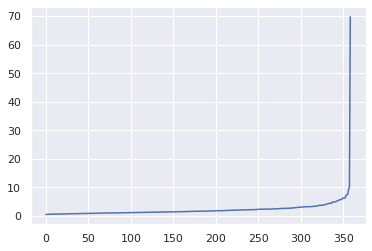

In [207]:
neigh = NearestNeighbors(n_neighbors=12)
nbrs = neigh.fit(d1)
distances, indices = nbrs.kneighbors(d1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(d1)
S=[] # store Silhouette scores
comb=[] # store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(10,70) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(20,27)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(X_scaled)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X_scaled, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

In [209]:
scaler = StandardScaler() # min_samp = 2 x #features, use KNN to determin eps
X_scaled = scaler.fit_transform(d1)
model2 = DBSCAN(eps=9, min_samples=12) #eps=8, min_samples=3
clm2 = model2.fit(X_scaled)
d1['DBSCAN'] = clm2.labels_

# Sort the dataframe so clusters in the legend follow the number order
d1=d1.sort_values(by=['DBSCAN'])
# d1.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6']
# Create a 3D scatter plot
fig = px.scatter_3d(d1, x=d1['Component 1'], y=d1['Component 2'], z=d1['Component 3'], 
                    opacity=1, color=d1['DBSCAN'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['Component 4', 'Component 5'],
                    width=900, height=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()


Text(0, 0.5, 'Cumulative Explained Variance')

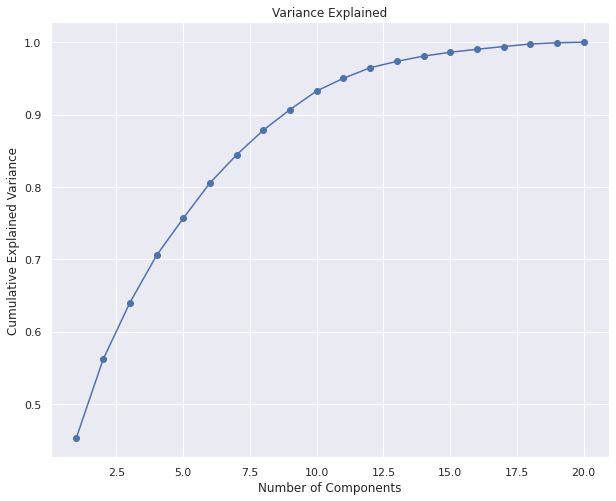

In [172]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(d1)

pca = PCA()
pca.fit(segmentation_std)

plt.figure(figsize=(10,8))
plt.plot(range(1,21), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# select components that VAR higher than 0.8
# here: 3

In [188]:
pca = PCA(n_components=6)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

In [ ]:
pca = PCA(n_components=7)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

In [52]:
pca = PCA(n_components=8)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

In [83]:
wcss = []
for i in range(1,20):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

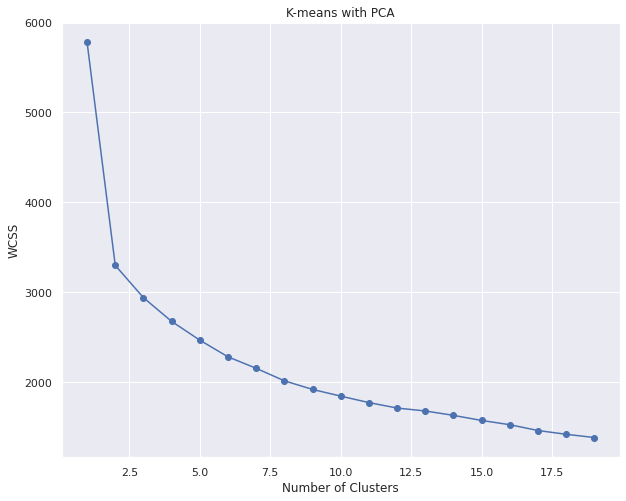

In [84]:
plt.figure(figsize=(10,8))
plt.plot(range(1,20), wcss, marker='o', linestyle='-')
plt.title('K-means with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
# select Number of Clusters that before curve becomes very flat

In [85]:
kl = KneeLocator(range(1, 20), wcss, curve="convex", direction="decreasing")
kl.elbow

4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


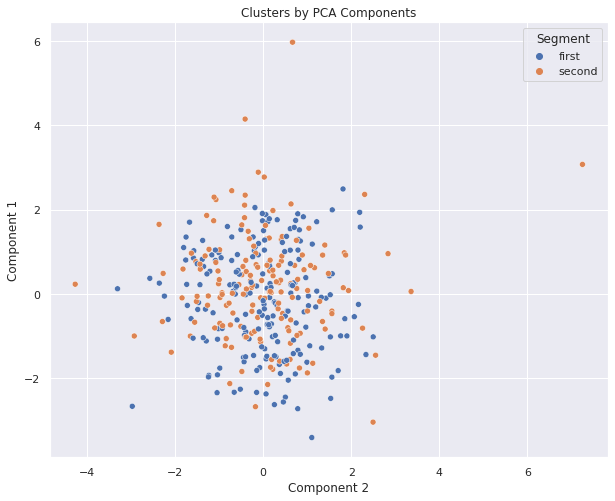

In [75]:
kmeans_pca = KMeans(n_clusters=(2), init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

In [189]:
d1.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


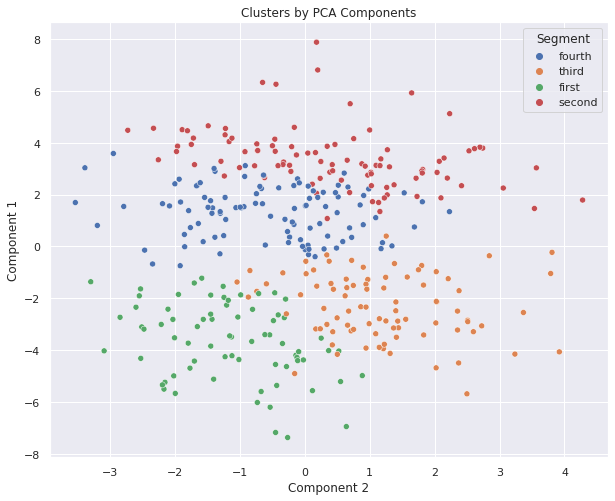

In [86]:
kmeans_pca = KMeans(n_clusters=(kl.elbow), init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


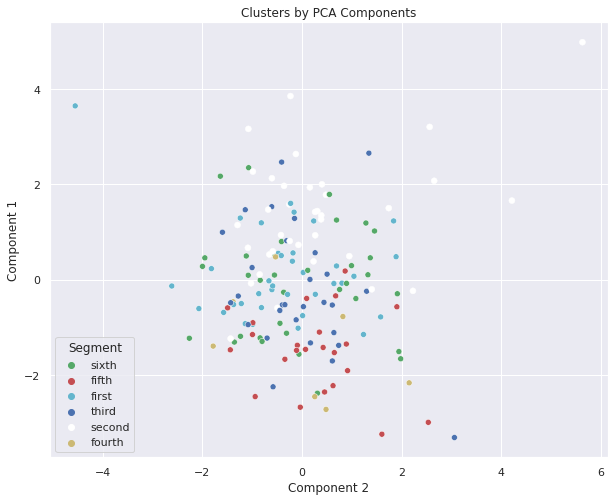

In [30]:
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


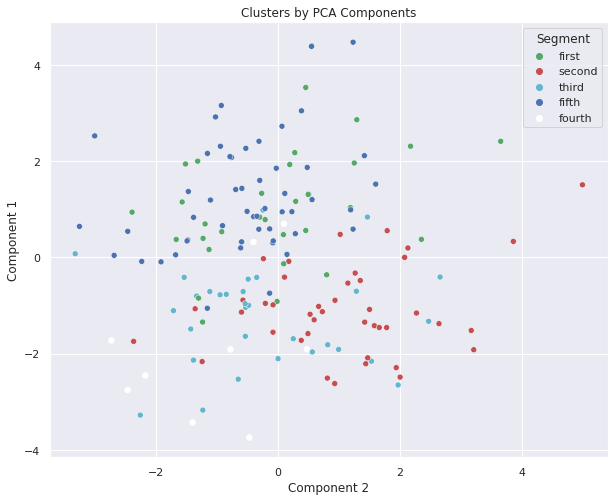

In [31]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6', 'Component 7']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


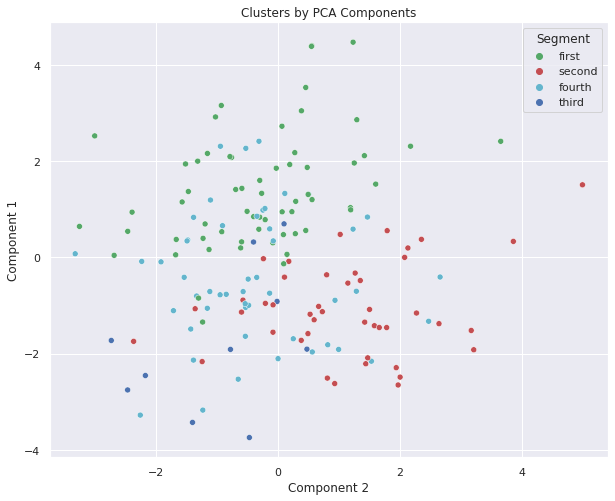

In [32]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6', 'Component 7']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


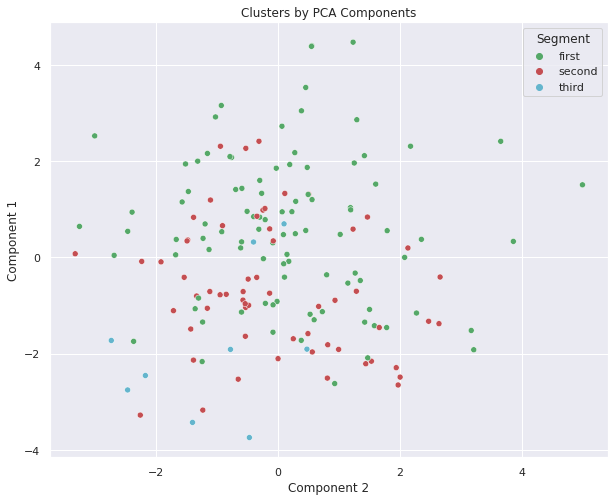

In [33]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6', 'Component 7']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'], palette = ['g','r','c'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


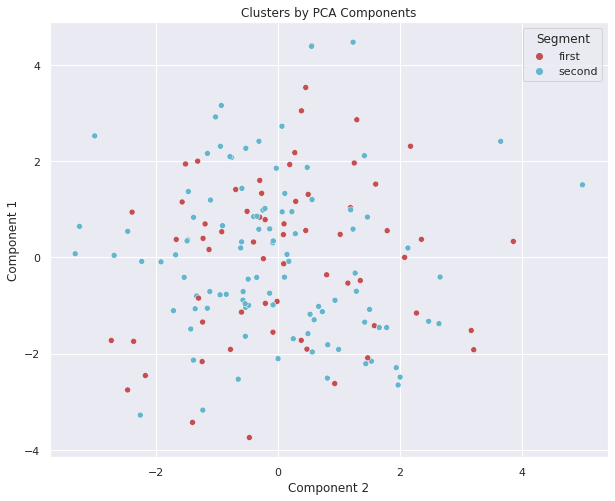

In [34]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data_pca_kmeans = pd.concat([d1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5','Component 6', 'Component 7']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
data_pca_kmeans['Segment'] = data_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third'}) # ,5:'sixth',6:'seventh',7:'eighth'
# 选择越靠前的components越能代表数据
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Segment'], palette = ['r','c'])
plt.title('Clusters by PCA Components')
plt.show()

In [202]:
danfoss = {'module_name': D['module_name'], 'dut': D['dut'], 'run': D['run'], 'state': D['state'], 'labels': clm2.labels_}

danfoss = pd.DataFrame(danfoss, columns = ['module_name', 'dut', 'run', 'state', 'labels'])
#danfoss.to_csv('PCA_Kmeans_ZF_cluster_in_class1.csv') 
danfoss.head()

,module_name,dut,run,state,labels
0,100,T1,run0,1,-1
1,101,T1,run0,1,-1
2,102,T1,run0,1,0
3,103,T1,run0,1,0
4,104,T1,run1,1,0


In [196]:
danfoss = {'module_name': D['module_name'], 'dut': D['dut'], 'run': D['run'], 'state': D['state'], 'labels': kmeans_pca.labels_}

danfoss = pd.DataFrame(danfoss, columns = ['module_name', 'dut', 'run', 'state', 'labels'])
#danfoss.to_csv('PCA_Kmeans_ZF_cluster_in_class1.csv') 
danfoss.head()

,module_name,dut,run,state,labels
0,100,T1,run0,1,3
1,101,T1,run0,1,3
2,102,T1,run0,1,2
3,103,T1,run0,1,2
4,104,T1,run1,1,0


In [206]:
labels = danfoss['labels'].tolist()
module_name = danfoss['module_name'].tolist()
run = danfoss['run'].tolist()
state = danfoss['state'].tolist()

class_out, class_0, class_1, class_2, class_3, class_4, class_5, class_6, class_7 = {}, {}, {}, {}, {}, {}, {}, {}, {}
class_out['mod'], class_0['mod'], class_1['mod'], class_2['mod'], class_3['mod'], class_4['mod'], class_5['mod'], class_6['mod'], class_7['mod'] = [], [], [], [], [], [], [], [], []
class_out['run'], class_0['run'], class_1['run'], class_2['run'], class_3['run'], class_4['run'], class_5['run'], class_6['run'], class_7['run'] = [], [], [], [], [], [], [], [], []
class_out['state'], class_0['state'], class_1['state'], class_2['state'], class_3['state'], class_4['state'], class_5['state'], class_6['state'], class_7['state'] = [], [], [], [], [], [], [], [], []

for i in range(len(labels)):
  if labels[i] == -1:
    class_out['mod'].append(module_name[i]) 
    class_out['run'].append(run[i])
    class_out['state'].append(state[i])    

  if labels[i] == 0:    
    class_0['mod'].append(module_name[i]) 
    class_0['run'].append(run[i])
    class_0['state'].append(state[i])

  if labels[i] == 1:    
    class_1['mod'].append(module_name[i]) 
    class_1['run'].append(run[i])
    class_1['state'].append(state[i])
    
  if labels[i] == 2:    
    class_2['mod'].append(module_name[i]) 
    class_2['run'].append(run[i])
    class_2['state'].append(state[i])
    
  if labels[i] == 3:    
    class_3['mod'].append(module_name[i]) 
    class_3['run'].append(run[i])
    class_3['state'].append(state[i])
    
  if labels[i] == 4:    
    class_4['mod'].append(module_name[i]) 
    class_4['run'].append(run[i])
    class_4['state'].append(state[i])
    
  if labels[i] == 5:    
    class_5['mod'].append(module_name[i]) 
    class_5['run'].append(run[i])
    class_5['state'].append(state[i])
    
  if labels[i] == 6:    
    class_6['mod'].append(module_name[i]) 
    class_6['run'].append(run[i])
    class_6['state'].append(state[i])
    
  if labels[i] == 7:    
    class_7['mod'].append(module_name[i]) 
    class_7['run'].append(run[i])    
    class_7['state'].append(state[i])

print('class_out:', class_out) 
print('class_0:', class_0)
print('class_1:', class_1)
print('class_2:', class_2)
print('class_3:', class_3)
print('class_4:', class_4)
print('class_5:', class_5)
print('class_6:', class_6)
print('class_7:', class_7)


class_out: {'mod': [100, 101], 'run': ['run0', 'run0'], 'state': [1, 1]}
class_0: {'mod': [102, 103, 104, 105, 106, 107, 108, 109, 10, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 11, 120, 121, 122, 124, 125, 127, 128, 129, 12, 130, 131, 132, 133, 134, 135, 137, 138, 139, 13, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 14, 150, 151, 152, 153, 154, 155, 156, 157, 159, 15, 160, 161, 162, 163, 165, 166, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 17, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 18, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 19, 1, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 21, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 22, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 23, 23, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 24, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 259, 25, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 26, 270, 271, 272, 273, 27